## $\color{red}{\text{Tsia202a : Time Series}}$

#### Maël Le Guillouzic et Kilian Berlivet
*TPs de TSIA 202a n°1,2 et 3*

In [34]:
## imports
import librosa
import soundfile as sf
import scipy
import numpy as np
import math
from collections import defaultdict
from tqdm import tqdm
import matplotlib.animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import pandas as pd
import seaborn as sns

## TP n°1

**Instructions :**

The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





### Question 1

Pour chacun des 3 processus, on va calculer la moyenne et la covariance théorique :

**Premier Processus :**
Soit un bruit blanc $Z_t$ qui suit $W\hspace{-2pt}N(0,\sigma^2)$ que l'on notera `WN`, de moyenne nulle (par définition d'un bruit blanc) et de variance $\sigma^2$. On définit un premier processus $X_t$ de la facon suivante : $X_t=a+bZ_t+Z_{t-1}$. On a ainsi pour l'esperance et l'autocovariance de ce processus les résultats suivants :

<img src="q1_tp1_p2.jpg" alt="Processus 2" width="800"/>

**Deuxième processus :** $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$, on a :

<img src="q1_tp1_p3.jpg" alt="Processus 3" width="500"/>

**Troisième Processus :** Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

<img src="q1_tp1_p4.jpg" alt="Processus 4" width="500"/>

### Question 2

Dans un premier temps, générons chacun des processus, calculons leur moyenne empirique ainsi que l'autocovariance empirique. On pourra ainsi comparer les deux résultats. 

On définira certains paramètres manuellement, tels que $\sigma$ et $a$ ou $b$.

#### 1. Bruit Blanc

Moyenne théorique de WN :  0
Moyenne empirique de WN :  -0.0208842181252935
Variance théorique de WN :  1
Variance empirique de WN :  0.9853141762262343


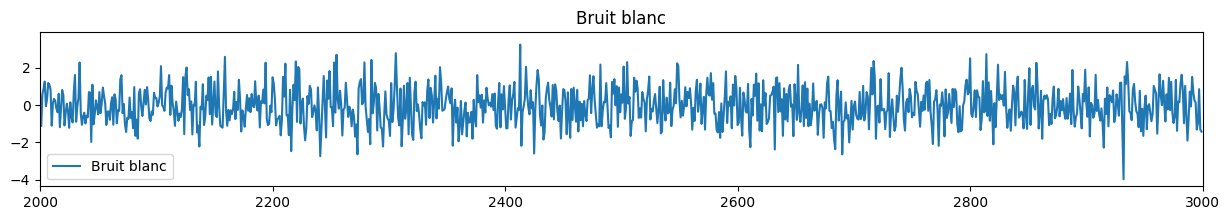

In [35]:
# Bruit Blanc
sigma = 1
n = 3000
a = 2
b = 4

WN = np.random.normal(0, sigma, n) # on prend 3000 échantillons.

print("Moyenne théorique de WN : ", 0)
print("Moyenne empirique de WN : ", np.mean(WN))

print("Variance théorique de WN : ", sigma**2)
print("Variance empirique de WN : ", np.var(WN))

fig = plt.figure(figsize=(15, 2))
plt.plot(WN, label='Bruit blanc')
plt.title('Bruit blanc')
plt.xlim(2000,3000)
plt.legend()
plt.show()

On définit une fonction `covariance` qui calcule $\gamma(h)$ pour notre bruit blanc.

In [36]:
def covariance(X, h):
    n = len(X)
    moy = np.mean(X)
    cov = (1/n)*np.sum((X[0:n-h]-moy)*(X[h:n]-moy))
    return cov

#### 2. Premier Processus

Moyenne théorique de X1 :  2
Moyenne empirique de X1 :  1.8951629552761498


Gamma(0) théorique :  17
Gamma(0) :  16.854965135054954


Gamma(1) théorique :  4
Gamma(1) :  4.231245869239973


Gamma(2) théorique :  0
Gamma(2) :  0.3895045633805438


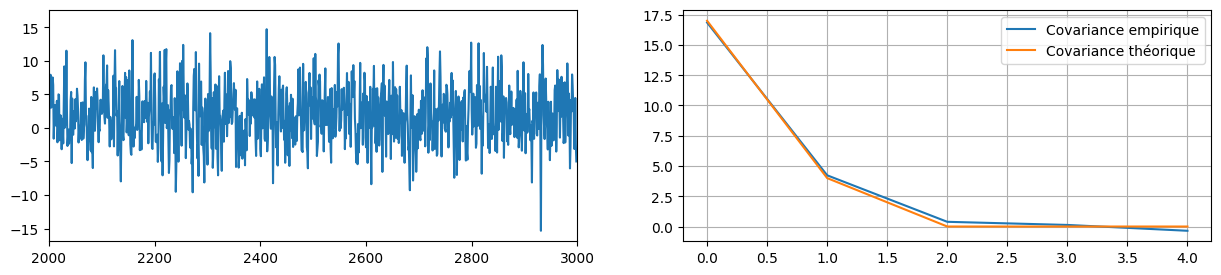

In [37]:
X1 = [a + b*WN[t] + WN[t-1] for t in range(1,n)]

# Definissons une fonction gamma qui se chargera du calcul de la covariance théorique du processus X1

def gamma1(h):
    if h == 0:
        return (b**2 + 1)*sigma**2
    elif h == 1:
        return b*sigma**2
    else:
        return 0

print("Moyenne théorique de X1 : ", a)
print("Moyenne empirique de X1 : ", np.mean(X1))
print('\n')
print("Gamma(0) théorique : ", gamma1(0))
print("Gamma(0) : ", covariance(X1, 0))
print('\n')
print("Gamma(1) théorique : ",  gamma1(1))
print("Gamma(1) : ", covariance(X1, 1))
print('\n')
print("Gamma(2) théorique : ", gamma1(2))
print("Gamma(2) : ", covariance(X1, 2))


fig = plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
plt.plot(X1, label='X1')
plt.xlim(2000,3000)

plt.subplot(1, 2, 2)
plt.plot([covariance(X1,t) for t in range(5)], label='Covariance empirique')
plt.plot([gamma1(t) for t in range(5)], label='Covariance théorique')
plt.legend()
plt.grid(True)

#### 3. Deuxième Processus

Moyenne théorique de X2 :  2
Moyenne empirique de X2 :  1.9597838842814306


    Theorique  Empirique    Ecart
0     1.33333    1.34305  0.00972
1     0.66667    0.69474  0.02807
2     0.33333    0.35904  0.02571
3     0.16667    0.17007  0.00340
4     0.08333    0.05186  0.03147
5     0.04167   -0.01698  0.05865
6     0.02083   -0.01013  0.03097
7     0.01042   -0.00176  0.01217
8     0.00521   -0.01227  0.01748
9     0.00260    0.01363  0.01102
10    0.00130   -0.01655  0.01785
11    0.00065    0.00136  0.00071
12    0.00033   -0.00038  0.00070
13    0.00016    0.00209  0.00193
14    0.00008   -0.03646  0.03655
15    0.00004   -0.04524  0.04528
16    0.00002   -0.04115  0.04117
17    0.00001   -0.04537  0.04538
18    0.00001   -0.04517  0.04517
19    0.00000   -0.02165  0.02166
20    0.00000   -0.02870  0.02870
21    0.00000   -0.02931  0.02931
22   -0.00000   -0.02685  0.02685
23   -0.00000   -0.02517  0.02517
24   -0.00001   -0.02401  0.02400


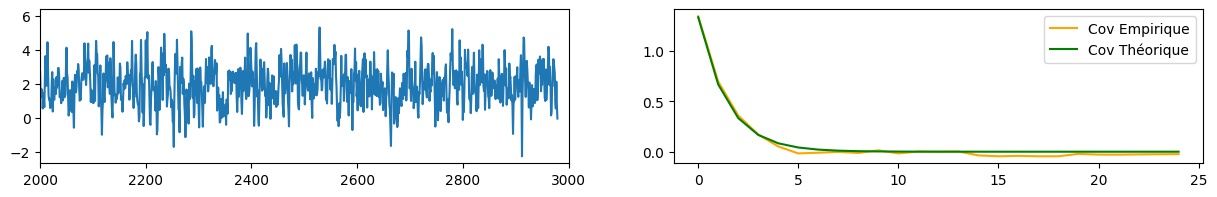

In [38]:
K=20
R = 25
X2 = [a+np.sum([WN[t-k]*(2**(-k)) for k in range(0,K+1)]) for t in range(K,n)]

def gamma2(h):
    return ((4/3)*sigma**2)*((1/2)**h)*(1-(1/4)**(K-h+1))

print("Moyenne théorique de X2 : ", a)
print("Moyenne empirique de X2 : ", np.mean(X2))
print('\n')

data = {
    'Theorique': [gamma2(h) for h in range(R)],
    'Empirique': [covariance(X2,h) for h in range(R)],
    'Ecart' : [abs(gamma2(h)-covariance(X2,h)) for h in range(R)]
}
df = pd.DataFrame(data)
df = df.apply(lambda x: round(x, 5))
print(df)

del df

fig = plt.figure(figsize=(15, 2))
plt.subplot(1, 2, 1)
plt.plot(X2, label='X2')
plt.xlim(2000,3000)

plt.subplot(1, 2, 2)
plt.plot([covariance(X2,h) for h in range(R)], label='Cov Empirique', color='orange')
plt.plot([gamma2(h) for h in range(R)], label='Cov Théorique', color='green')
plt.legend()

#### 4. Troisième Processus

Moyenne théorique de X3 :  0
Moyenne empirique de X3 :  -0.020950291618184746
    Theorique  Empirique     Ecart
0    1.500000   1.468458  0.031542
1    0.030464   0.042102  0.011638
2   -0.496288  -0.460902  0.035386
3   -0.090939  -0.082617  0.008322
4    0.485206   0.455787  0.029420
5    0.150064   0.108754  0.041311
6   -0.466920  -0.459291  0.007630
7   -0.206961  -0.187460  0.019501
8    0.441701   0.402732  0.038969
9    0.260785   0.283924  0.023140
10  -0.409923  -0.421434  0.011511
11  -0.310736  -0.291546  0.019189
12   0.372058   0.356288  0.015770
13   0.356073   0.365579  0.009506
14  -0.328669  -0.339388  0.010719


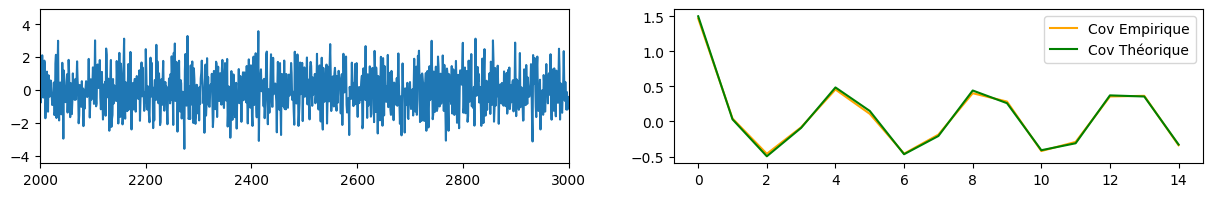

In [39]:
ld = np.random.uniform(0,np.pi)
Phi0 = np.random.uniform(0,2*np.pi)
A0 = 1
r = 15

X3 = [(A0*np.cos(ld*t + Phi0) + WN[t]) for t in range(n)]

print("Moyenne théorique de X3 : ", 0)
print("Moyenne empirique de X3 : ", np.mean(X3))

def gamma3(h):
    if h == 0:
        return (A0**2)/2 + sigma**2
    else:
        return ((A0**2)/2)*np.cos(ld*h)

theo = [gamma3(h) for h in range(r)]

data = {
    'Theorique' : theo, 
    'Empirique' : [covariance(X3,h) for h in range(r)],
    'Ecart' : [abs(theo[h] - covariance(X3,h)) for h in range(r)]
}
df = pd.DataFrame(data)
print(df)

del df

fig = plt.figure(figsize=(15, 2))
plt.subplot(1, 2, 1)
plt.plot(X3, label='X3')
plt.xlim(2000,3000)

plt.subplot(1, 2, 2)
plt.plot([covariance(X3,h) for h in range(r)], label='Cov Empirique', color='orange')
plt.plot(theo, label='Cov Théorique', color='green')
plt.legend()

### Question 4

MSE pour X1 :  15.364191812850596
MSE pour X2 :  0.13397295192831662
MSE pour X3 :  0.08918678860262479


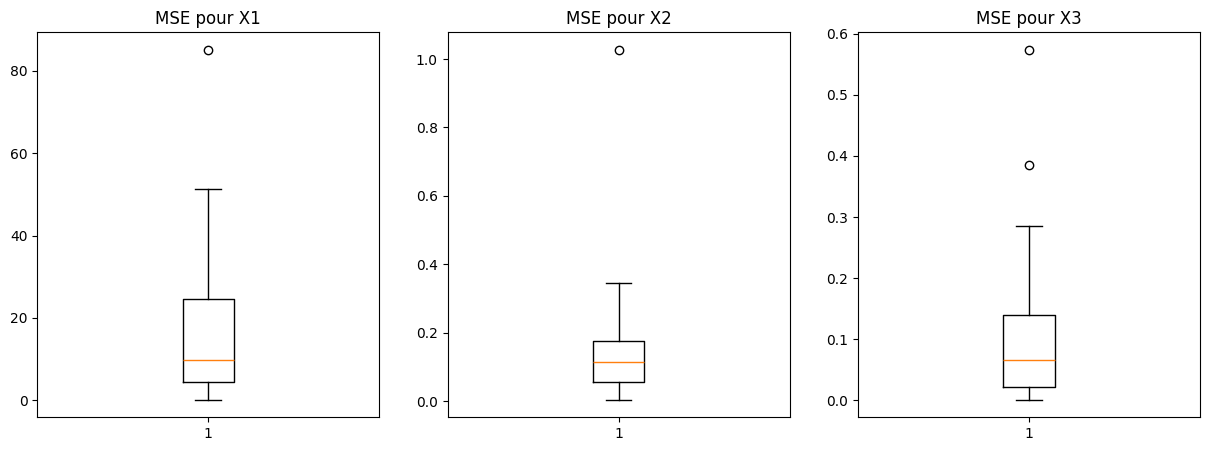

In [40]:
Params = {
    'sigma' : 1,
    'a' : 2,
    'b' : 4,
    'K' : 20,
    'ld' : np.random.uniform(0,np.pi),
    'Phi0' : np.random.uniform(0,2*np.pi),
    'A0' : 1,
}
T = [10,100,500,1000]
# On va fixer h, sinon je ne vois pas comment on peut faire
h = 0

MSE_X1,MSE_X2,MSE_X3 = [],[],[]
for n in range(100):
    # On créer nos 4 processus
    WN = np.random.normal(0, Params['sigma'], 1000)
    X1 = [Params['a'] + Params['b']*WN[t] + WN[t-1] for t in range(1,1000)]
    X2 = [Params['a']+np.sum([WN[t-k]*(2**(-k)) for k in range(0,Params['K']+1)]) for t in range(Params['K'],1000)]
    X3 = [(Params['A0']*np.cos(Params['ld']*t + Params['Phi0']) + WN[t]) for t in range(1000)]

    # Calculons pour chacun d'entre eux la covariance empirique, en fonction de h pour différentes valeurs de T
    cov_emp_X1=[covariance(X1[:t],h) for t in T]
    cov_emp_X2=[covariance(X2[:t],h) for t in T]
    cov_emp_X3=[covariance(X3[:t],h) for t in T]

    # On va maintenant calculer les covariances théoriques
    cov_theo_X1 = [gamma1(h) for t in T]
    cov_theo_X2 = [gamma2(h) for t in T]
    cov_theo_X3 = [gamma3(h) for t in T]

    # On va désormais calculer la MSE pour chaque processus
    MSE_unique_X1 = np.sum([(cov_emp_X1[i] - cov_theo_X1[i])**2 for i in range(len(T))])/len(T)
    MSE_unique_X2 = np.sum([(cov_emp_X2[i] - cov_theo_X2[i])**2 for i in range(len(T))])/len(T)
    MSE_unique_X3 = np.sum([(cov_emp_X3[i] - cov_theo_X3[i])**2 for i in range(len(T))])/len(T)

    # Ceci nous donne la MSE pour un tirage.
    # Réalisons un grand nombre de tirages pour obtenir une estimation de la MSE, 1000 par exemple et stockons tout cela dans un tableau
    MSE_X1.append(MSE_unique_X1)
    MSE_X2.append(MSE_unique_X2)
    MSE_X3.append(MSE_unique_X3)

# On veut afficher un bxplot pour chaque processus
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(MSE_X1)
plt.title('MSE pour X1')

plt.subplot(1, 3, 2)
plt.boxplot(MSE_X2)
plt.title('MSE pour X2')

plt.subplot(1, 3, 3)
plt.boxplot(MSE_X3)
plt.title('MSE pour X3')

print("MSE pour X1 : ", np.mean(MSE_X1))
print("MSE pour X2 : ", np.mean(MSE_X2))
print("MSE pour X3 : ", np.mean(MSE_X3))


## TP n°2 : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{-i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

### Question 1

**Question :** For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$


**Réponse :** On peut simplifier la définition complète du périodogramme puisque les signaux que nous étudions sont tous de moyenne nulle. Ainsi :
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{h=0}^{n-1} (X_h-\mu_n) e^{-i\lambda h}|^2 = \frac{1}{2\pi n}|\sum_{h=0}^{n-1}X_h e^{-i\lambda h}|^2
$$
Donc : $$ I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n}|\sum_{h=0}^{n-1}X_h e^{-2i\pi \frac{hk}{m}}|^2 $$

Et par ailleurs : $$ DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}} $$

Par identification dans $ I_n(\frac{2\pi k}{m}) $ on a bien :
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$

### Question 2

**Question :** Provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session.

**Réponse :** Commencons par importer les librairies nécéssaires ainsi que re-définir les processus générés dans le TP1.

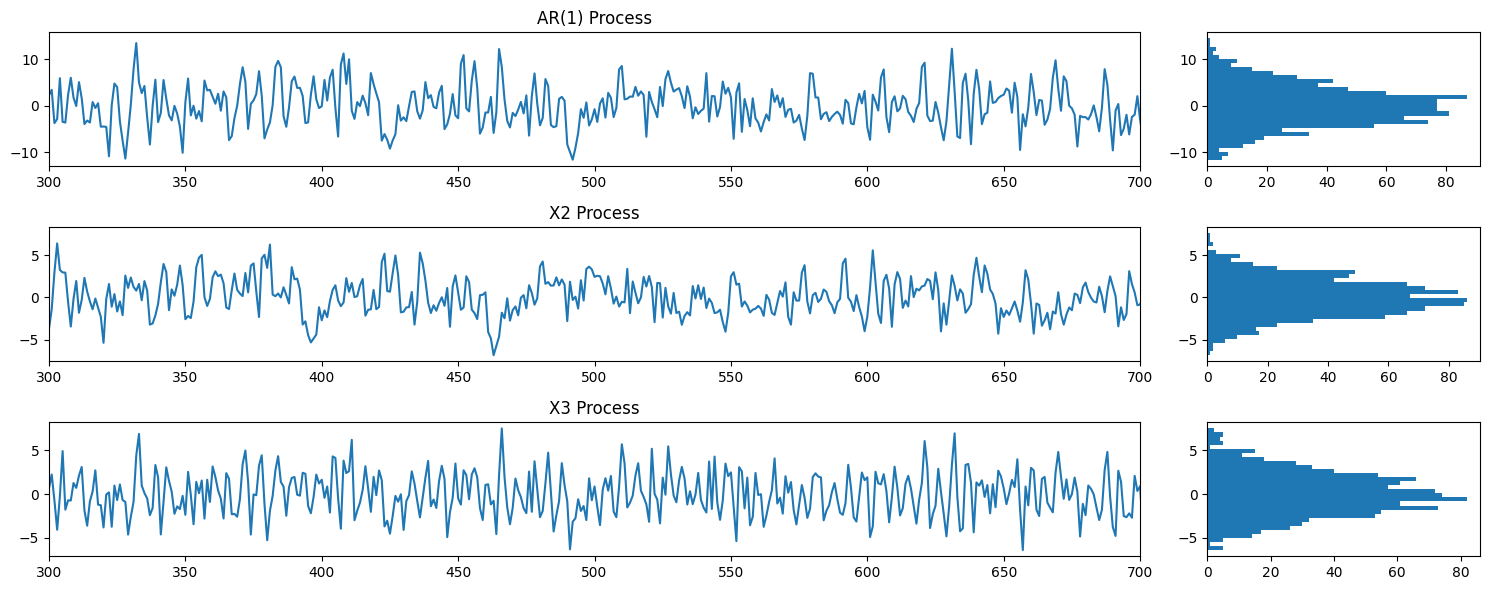

In [41]:
Params = { #On utilise ce dictionnaire pour enregistrer tous les paramètres de nos processus respectifs
    'sigma' : 2,
    'a' : 0,
    'b' : 2,
    'K' : 30,
    'ld' : np.random.uniform(0,np.pi),
    'Phi0' : np.random.uniform(0,2*np.pi),
    'A0' : 2,
}
N = 1000

WN = np.random.normal(0, Params['sigma'],N)
X1 = [Params['a'] + Params['b']*WN[t] + WN[t-1] for t in range(1,N)]
X2 = [Params['a']+np.sum([WN[t-k]*(2**(-k)) for k in range(0,Params['K']+1)]) for t in range(Params['K'],N)]
X3 = [(Params['A0']*np.cos(Params['ld']*t + Params['Phi0']) + WN[t]) for t in range(N)]


fig =plt.figure(figsize=(15,6))
gs = fig.add_gridspec(3, 2, width_ratios=[4,1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(X1)
ax1.set_xlim(300,700) # on va tronquer l'affichage de nos signaux pour une meilleure lisibilitée
ax1.set_title('AR(1) Process')

ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(X1, bins=30, orientation='horizontal')

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(X2)
ax3.set_xlim(300,700)
ax3.set_title('X2 Process')

ax4 = fig.add_subplot(gs[1, 1])
ax4.hist(X2, bins=30, orientation='horizontal')

ax5 = fig.add_subplot(gs[2, 0])
ax5.plot(X3)
ax5.set_xlim(300,700)
ax5.set_title('X3 Process')

ax6 = fig.add_subplot(gs[2, 1])
ax6.hist(X3, bins=30, orientation='horizontal')

plt.tight_layout()


On va ainsi définir une fonction `periodogram()` qui prend en entrée notre signal sur lequel on souhaite travailler, ainsi que l'ordre de la DFT. Il retournera le periodogram selon la formule calculée en question 1.

In [42]:
M = 3*N
def periodogam(X,m):
    n = len(X)
    DFT_X = np.fft.fft(X,n=m)
    periodogram = (1/(2*np.pi*m))*np.abs(DFT_X)**2
    return periodogram

Executons cette fonction sur nos signaux, et affichons le résultat.

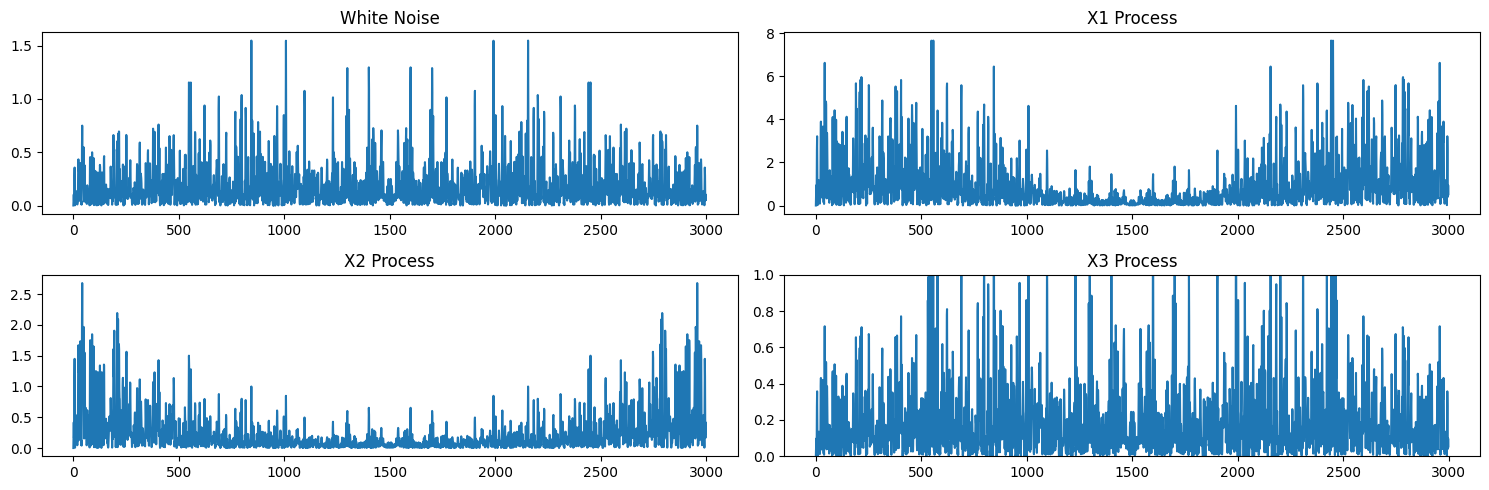

In [43]:
I0 = periodogam(WN,M)
I1 = periodogam(X1,M)
I2 = periodogam(X2,M)
I3 = periodogam(X3,M)

fig =plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.plot(I0)
plt.title('White Noise')

plt.subplot(2,2,2)
plt.plot(I1)
plt.title('X1 Process')

plt.subplot(2,2,3)
plt.plot(I2)
plt.title('X2 Process')

plt.subplot(2,2,4)
plt.plot(I3)
plt.title('X3 Process')
plt.ylim(0,1)

plt.tight_layout()

### Question 3

**Question :** Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$

**Réponse :**

<img src="q3_tp2.jpg" alt="Question 4" width="500"/>

### Question 4

**Question :** How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

**Réponse :**

<img src="q4_tp2.jpg" alt="Question 4" width="500"/>

### Question 5

**Question :** In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.

**Réponse :**
Générons différents bruits blancs de longueur $n$ différents. Estimons pour chacun d'entre eux la variance de leur periodogramme en utilisant la formule démontrée à la question 4.

In [44]:
variances = {}
longueurs = (100, 500, 1000, 2500, 10000, 25000, 100000)
for l in longueurs:
    bruit_blanc = np.random.normal(0, Params['sigma'],l)
    variances[l] = 1/l*np.fft.ifft(np.abs(np.fft.fft(bruit_blanc,l))**2,l)[0]
for elmt in variances :
    print(f"La variance du bruit blanc de longueur {elmt} est : {variances.get(elmt)}")


La variance du bruit blanc de longueur 100 est : (3.7851656452490574+0j)
La variance du bruit blanc de longueur 500 est : (3.9319641607386147+0j)
La variance du bruit blanc de longueur 1000 est : (3.8157408618846995+0j)
La variance du bruit blanc de longueur 2500 est : (3.8350930496531728+0j)
La variance du bruit blanc de longueur 10000 est : (3.931488537529735+0j)
La variance du bruit blanc de longueur 25000 est : (4.035627527310779+0j)
La variance du bruit blanc de longueur 100000 est : (3.999799975950602+0j)


On ne remarque que c'est proche de $\sigma^2$, mais c'est à peu près tout ... Essayons de tracer pour y voir un peu plus clair.

C:\Users\maell\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\maell\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Variance of the periodogram of white noise')

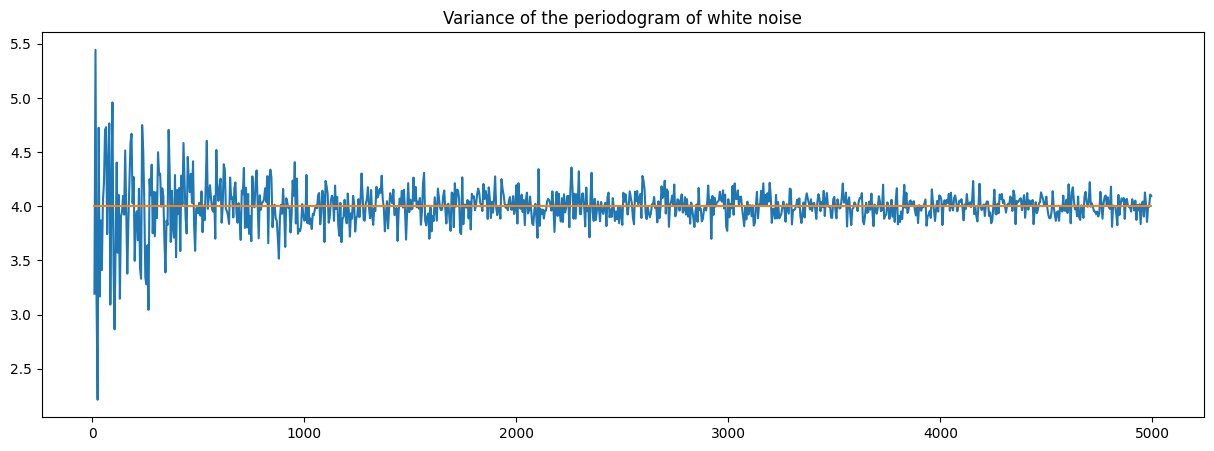

In [45]:
variances = []
for i in range(10,5000,5):
    bruit_blanc = np.random.normal(0, Params['sigma'],i)
    variances.append(1/i*np.fft.ifft(np.abs(np.fft.fft(bruit_blanc,i))**2,i)[0])

fig = plt.figure(figsize=(15,5))
plt.plot(np.arange(10,5000,5),variances)
plt.plot(np.arange(10,5000,5),[Params['sigma']**2]*998)
plt.title('Variance of the periodogram of white noise')

On y retrouve en effet que la variance d'un bruit blanc est $\sigma^2$.

## TP n°3

The goal of this third partical work is to use an AR(p) process to model a speech signal, and show that this approch is surprisingly powerful despite its simplicity.

The proposed synthesis algorithm divides into several steps.
1. Filter the audio signal to emphasize the highest frequencies (in order to flatten the spectrum and reduce precision issues with FFT computations).
2. Split the signal into several overlapping frames and iterate over them.
    1. Detect if the frame corresponds to noise or to a voiced signal, and estimate the fundamental frequency in the later case.
    2. Estimate the AR(p) coefficients using Yule-Walker equations.
    3. Re-synthetise the frame using the AR(p) coefficients, starting from a white noise in the case of a noisy frame, or a Dirac comb in the case of a voiced frame.
3. Overlap-add the synthesized frames with a Hanning window.
4. Filter the synthesised signal to de-emphasize the highest frequencies.

We propose to implement this algorithm in two parts. First, we will derive the Yule-Walker equations, and test them on synthetic data. Then, we will code the synthesis algorithm and apply it on a real world speech signal.

## 1. Yule-Walker equations

Let us consider a causal, zero-mean, AR(p) process defined by the following recurrent equation: 
$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + Z_t
$$
where $\{Z_t , t \in \mathbb{Z}\}$ is a weak white noise with variance $\sigma^2$.

### Question 1

**Question :** Show that, $\forall h \geq 1, \mathbb{E}[X_{t-h}Z_t]=0$.

**Réponse :** Le processus étant causal, $X_t$ ne dépend que des éléments passés donc $X_{t-h}$ est indépendant de $Z_t$ $ \forall h \ge 1 $. 

Ainsi $\forall h \geq 1, \mathbb{E}[X_{t-h}Z_t]=0$.



### Question 2

**Question :** Deduce a recurrent relation between $\gamma(h)$ and $\gamma(h-1),\gamma(h-2),\ldots,\gamma(h-p)$, for $h \geq 1$.


**Réponse :**

<img src="q2_tp3.jpg" alt="Question 2" width="600"/>

### Question 3
**Question :** We consider separately the case $h=0$: find a new relationship between $\gamma(0)$ and $\gamma(-1),\gamma(-2),\ldots,\gamma(-p)$.

**Réponse :**

<img src="q3_tp3.jpg" alt="Question 3" width="500"/>

### Question 4

**Question :** Put these relationships in matrix form:
\begin{equation}
\Gamma_{p+1}[1 \; -\phi_1 \; \ldots \; -\phi_p]^T = [\sigma_2 \; 0 \; \ldots \; 0]^T 
\end{equation}
where $\Gamma_{p+1}$ is a suitable Toeplitz matrix that you have to determine.

**Réponse :**

<img src="q4_tp3.jpg" alt="Question 4" width="500"/>

# 2. Evaluation on synthetic data

We will now evaluate equation $(1)$ on a synthetically generated AR(p) process.

**Question :** Generate n=1000 samples of an AR(4) process.

In [46]:
sigma = 2
phi = [0.1, -0.8, 0.3, -0.5] # on définit manuellement les coeffcients de notre processus. On a fait attention à prendre des valeurs négatives et positives pour garantir la stabilité.

def WN(sigma): # definition du bruit blanc qu'on utilisera pour la simulation de notre processus AR(4)
    return np.random.normal(0, sigma)

def AR_4(phi,n):
    x = np.zeros(n)
    x[0] = WN(sigma) #le premier terme est un bruit blanc
    for i in range(1,n):
        if i < 4 : # on discocie le cas de nos 4 premiers termes du reste du processus
            x[i] = np.convolve(phi,x[:i])[0] + WN(sigma)
        else :
            x[i] = np.convolve(phi,x[i-4:i])[0] + WN(sigma)
    return x

Text(0.5, 1.0, 'AR(4) process')

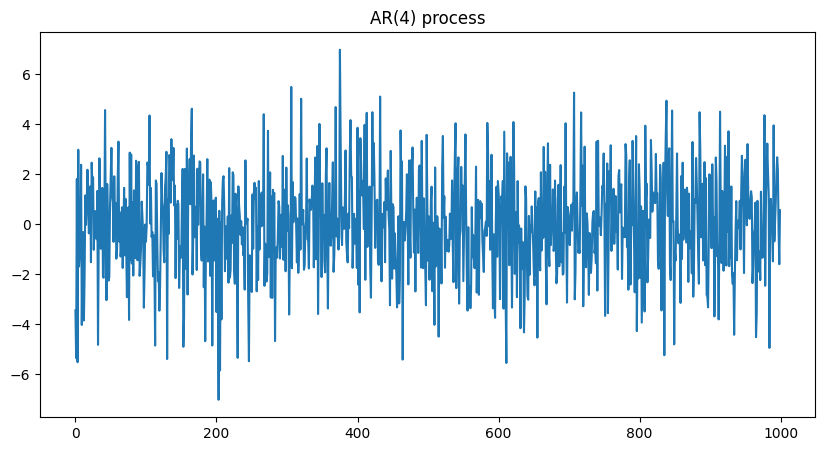

In [47]:
X = AR_4(phi,1000)
fig = plt.figure(figsize=(10,5))
plt.plot(X)
plt.title('AR(4) process')

2. **Question :** Estimate $\Gamma_{p+1}$ using these samples.

**Réponse :** Calculer $\Gamma_{p+1}$ revient à calculer les autocovariances $\gamma(h)$. Pour cela nous utilisons la formule de récurrence de la question 2.

In [48]:
def gamma(X,h):
    return np.sum((X[:len(X)-h] - np.mean(X)) * (X[h:] - np.mean(X))) / len(X)

Gamma5 = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        Gamma5[i][j] = gamma(X,abs(i-j))

print("Matrice d'Auto-covariances du processus AR(4) :")
Gamma5_df = pd.DataFrame(Gamma5)
Gamma5_styled = Gamma5_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
).hide(axis='index').hide(axis='columns')
Gamma5_styled

Matrice d'Auto-covariances du processus AR(4) :


4.018036,0.060472,-0.177254,-0.022619,0.319464
0.060472,4.018036,0.060472,-0.177254,-0.022619
-0.177254,0.060472,4.018036,0.060472,-0.177254
-0.022619,-0.177254,0.060472,4.018036,0.060472
0.319464,-0.022619,-0.177254,0.060472,4.018036


### Question 3
**Question :** Use equation $(1)$ to estimate $\sigma^2$ and the coefficients $\phi_1,\phi_2,\ldots,\phi_p$. Compute the relative error between the estimated and the true coefficients.

**Réponse :** On rapelle l'équation 1
\begin{equation}
\Gamma_{p+1}[1 \; -\phi_1 \; \ldots \; -\phi_p]^T = [\sigma_2 \; 0 \; \ldots \; 0]^T 
\end{equation}
C'est un système linéaire à 5 inconnues : $\sigma$ et les 4 coefficients $\phi_p$

In [49]:
b = np.zeros(5)
b[0] = 1
y = np.dot(np.linalg.inv(Gamma5),b)

In [51]:
sigma_est = np.sqrt(1/y[0])
coeffs = -y*sigma_est**2
coeffs[0] = 1

print(f"Sigma = {sigma_est}")
print(f"Phis = {coeffs}")

Sigma = 1.9962051150016402
Phis = [ 1.          0.01586109 -0.04083517 -0.00548723  0.07787792]


In [53]:
real_coeffs = np.concatenate(([1],phi))
err= coeffs-real_coeffs
rel_err =  np.linalg.norm(err)/np.linalg.norm(phi) 
print('Erreur Relative {0:.2%} '.format(rel_err))

Erreur Relative 101.04% 


### Question 4 
**Question :** Estimate power spectral distribution of the synthesized signal. Compare with the theoretical distribution obtained from the poles of $1/\Phi(z^{-1})$.

# 3. Speech modeling
We will now implement the synthesis algorithm and evaluate it on a speech signal. 

A code template is provided below. We will use the file audio.wav to test the algorithm. 

LIsten to the original and synthesized signal by using any audio player. Try to modify the pitch of the synthesised signal and listen to the result.

In [ ]:
## hyperparameters
sampling_rate = 8000 # (Hz)
frame_duration = 0.04 # duration of the analysis frames (seconds)
overlap_ratio = 0.5 # overlap ratio between two consecutive analysis frames
p = 12 # AR(p) model order
f_min = 80 # minimum frequency for pitch detection (Hz)
f_max = 400 # maximum frequency for pitch detection Hz)
pitch_detection_threshold = 0.5 # threshold for pitch detection

In [ ]:
## synthesis

# load audio
x = librosa.load('audio.wav', sr=sampling_rate)[0]

# pre-emphasis filtering
x = scipy.signal.lfilter([1, -0.98], [1], x)

# handy variables
n_frame = math.floor(len(x) / (sampling_rate * frame_duration * (1 - overlap_ratio))) - 1 # discard last frame
frame_length = int(sampling_rate * frame_duration)
min_period = math.floor(sampling_rate / f_max)
max_period = math.ceil(sampling_rate / f_min)
synthesis = np.zeros(len(x))
log_dict = defaultdict(list)

# loop over frames
for frame_index in tqdm(range(n_frame)):

    # extract frame
    start = int(frame_index * sampling_rate * frame_duration * (1 - overlap_ratio))
    end = start + frame_length
    frame = x[start:end]

    # detect pitch
    auto_covariance = np.fft.irfft(np.abs(np.fft.rfft(frame - np.mean(frame), (2*frame_length-1)))**2 / frame_length)[:frame_length]
    pitch, max_value = auto_covariance[min_period:].argmax() + min_period, auto_covariance[min_period:].max() / auto_covariance[0]
    if (pitch > max_period) or (max_value * frame_length / (frame_length - pitch) < pitch_detection_threshold): # detect silent frame 
        pitch = 0
    
    # estimate AR(p) coefficients
    gamma = ...
    v = np.array([1 if k==0 else 0 for k in range(p+1)])
    coefficient = ...
    sigma = ...
    coefficient = ...

    # re-synthetise frame
    if pitch == 0:
        noise = ...
        frame_r = scipy.signal.lfilter([1], coefficient, noise)
    else:
        dirac_comb = ...
        frame_r = scipy.signal.lfilter([1], coefficient, dirac_comb)
    frame_r = frame_r[p:]
    normalization_factor = np.sqrt(sigma / np.var(frame_r))
    frame_r = normalization_factor * frame_r[:frame_length]

    # overlap-add
    synthesis[start:end] += frame_r * np.hanning(frame_length)

    # compute power spectral density (for logging purposes)
    original_psd = ...
    synthesis_psd = ...

    # log
    log_dict["frame"].append(frame)
    log_dict["pitch"].append(pitch)
    log_dict["sigma"].append(sigma)
    log_dict["coefficient"].append(coefficient)
    log_dict["frame_r"].append(frame_r)
    log_dict["original_psd"].append(original_psd)
    log_dict["synthesis_psd"].append(synthesis_psd)

# de-emphasis filtering
synthesis = scipy.signal.lfilter([1], [1, -0.98], synthesis)

# log
sf.write('synthesis.wav', synthesis, sampling_rate)
log_dict["synthesis"].append(synthesis)
log_dict = {k: np.array(v) for k, v in log_dict.items()}

In [ ]:
## plot

# time axis for plotting
sample_time = np.linspace(0, len(x)/sampling_rate, len(x))
frame_time = np.linspace(0, n_frame*frame_duration*(1-overlap_ratio), n_frame)

# waveform
plt.title("waveform")
plt.plot(sample_time, x)
plt.show()

# pitch
plt.title("pitch")
plt.plot(frame_time, log_dict["pitch"])
plt.show()

# variance
plt.title("sigma")
plt.plot(frame_time, log_dict["sigma"])
plt.show()

# power spectral density
fig, ax = plt.subplots()
fig.suptitle("estimated & theoretical spectral density")
y_min = min(log_dict["original_psd"].min(), log_dict["synthesis_psd"].min())
y_max = max(log_dict["original_psd"].max(), log_dict["synthesis_psd"].max())
def animate(i):
    ax.cla()
    ax.set_ylim([y_min-0.1, y_max+0.1])
    ax.plot(log_dict["original_psd"][i], label="original_psd")
    ax.plot(log_dict["synthesis_psd"][i], label="synthesis_psd")
animation = matplotlib.animation.FuncAnimation(fig, animate, frames=len(log_dict["original_psd"]))
display(HTML(animation.to_jshtml()))
plt.close()

## To do a faire 

- Refaire la question 3 du TP1 parce que j'ai baclé
- Finir partie 3 du tp 3
- Tp 3 début a reprendre (les coeffs trouvés sont giga loin de la réalité et la q4 pas fait)